In [1]:
import sys
import cPickle as pickle
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
import sys
import cPickle as pickle
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class Process_Vector(object):
    def __init__(self):
        # 加载code vector
        result_dir = 'RESULT'
        code_vector_file = open(result_dir + '/code_vector' + '.seqs', 'rb')
        self.code_vector = pickle.load(code_vector_file)
        
        # 加载patient vector
        patien_vector_file = open(result_dir + '/patient_vector' + '.seqs', 'rb')
        self.patient_vector=pickle.load(patien_vector_file)
        
        # 加载visit vector
        visit_vector_file = open(result_dir + '/visit_vector' + '.seqs', 'rb')
        self.visit_vector =pickle.load(visit_vector_file)

        # 加载对照表
        outFile = 'SEQ'
        types_file = open(outFile + '/types' + '.seqs', 'rb')
        self.types = pickle.load(types_file)
        self.lookup = {value: key for key, value in self.types.items()} #key-value反序
        
        # 病人id对照表
        type_pids_file=open(outFile + '/type_pids' + '.seqs', 'rb')
        self.type_pids=pickle.load(type_pids_file)
        
        # 病人id
        pids_file=open(outFile + '/pids' + '.seqs', 'rb')
        self.pids=pickle.load(pids_file)

        code_vector_file.close()
        types_file.close()
        visit_vector_file.close()
        patien_vector_file.close()

    def Kmeans_for_code(self,k):
        types_num=k
        kmeans_model = KMeans(n_clusters=types_num).fit(self.code_vector)
        centroid_values = kmeans_model.cluster_centers_

        plt.figure(1)
        plt.scatter(self.code_vector[:, 0], self.code_vector[:, 1], s=50, alpha=0.5)
        plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=35)
        plt.title('code_clustering')
        plt.show()
        return centroid_values
        
    def KNN_for_code(self,icd9code, k):
        code = self.code_vector[self.types[icd9code]]
        x = self.code_vector
        distances = [np.sqrt(np.sum((x_t - code) ** 2)) for x_t in x]
        # 对数组进行排序，返回的是排序后的索引
        d = np.sort(distances)
        nearest = np.argsort(distances)
        near_code = [self.lookup[nearest[i]] for i in range(1, k + 1)]
        return near_code  
    
    def PCA_for_code(self, dim):
        pca = PCA(n_components=dim)
        newCode = pca.fit_transform(self.code_vector)
        plt.scatter(newCode[:,0],newCode[:,1])
        plt.title('PCA')
        plt.show()
        return newCode
    
    def cos_for_2id9code(self,a,b):
        vector_a = np.mat(self.code_vector[self.types[a]])
        vector_b = np.mat(self.code_vector[self.types[b]])
        num = float(vector_a * vector_b.T)
        denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
        cos = num / denom
        sim = 0.5 + 0.5 * cos #归一
        return sim
    
    def Kmeans_for_patinet(self,k):
        types_num=k
        # 处理一下patient_vector，貌似有点问题
        patient_vector=[]
        for i in range(len(self.patient_vector)):
            patient_vector.append(self.patient_vector[i][0])
        kmeans_model = KMeans(n_clusters=types_num).fit(patient_vector)
        centroid_values = kmeans_model.cluster_centers_
        
#        plt.figure(1)
#      plt.scatter(patient_vector[:, 0], patient_vector[:, 1], s=50, alpha=0.5)
#        plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=35)
#        plt.title('patient_clustering')
#       plt.show()
        return centroid_values

    def KNN_for_patient(self,patientid, k):
        p_vector = self.patient_vector[self.type_pids[patientid]]
        x = self.patient_vector
        distances = [np.sqrt(np.sum((x_t - p_vector) ** 2)) for x_t in x]
        # 对数组进行排序，返回的是排序后的索引
        d = np.sort(distances)
        nearest = np.argsort(distances)
        near_patient = [self.pids[nearest[i]] for i in range(1, k + 1)]
        return near_patient 
    

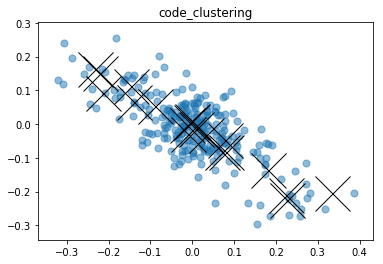

['D_453.41', 'D_253.0', 'D_512.1', 'D_483.0', 'D_707.03', 'D_482.42', 'D_491.21', 'D_482.41', 'D_284.89', 'D_707.24']


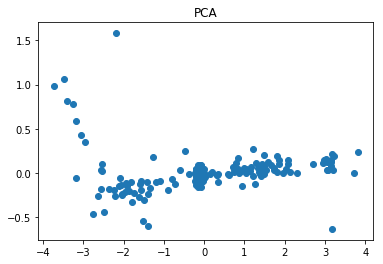

0.8157119916404983


[41976, 10117, 43881, 10088, 44083, 41795, 10119, 40124, 42135, 10094]

In [5]:
ProcessVector=Process_Vector()
ProcessVector.Kmeans_for_code(19)
print ProcessVector.KNN_for_code('D_202.80',10)
ProcessVector.PCA_for_code(2)
print ProcessVector.cos_for_2id9code('D_572.2','D_572.3')
ProcessVector.Kmeans_for_patinet(10)
ProcessVector.KNN_for_patient(10059,10)